In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv('ushape.csv')

In [93]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [95]:
df.columns=['X','y','z']

In [97]:
df.head()

,X,y,z
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


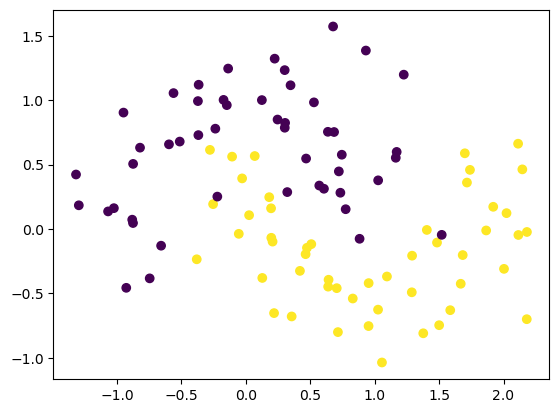

In [99]:
plt.scatter(df['X'],df['y'],c=df['z'])

In [101]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [103]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [105]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

C:\Users\PARAS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.get_weights()

[array([[ 0.4816864 ,  0.54074556, -0.24226296,  0.12512642, -0.7026669 ,
         -0.48431078,  0.5065786 ,  0.08315235, -0.5149298 ,  0.23133087],
        [-0.65470624, -0.15642786,  0.17890358,  0.5215568 ,  0.35319918,
          0.19789648,  0.6788326 , -0.65094304,  0.40463132,  0.45824164]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7381647 ],
        [-0.63280076],
        [ 0.72022825],
        [ 0.48675388],
        [-0.28009877],
        [ 0.36365145],
        [ 0.27219766],
        [-0.30513823],
        [-0.4221614 ],
        [ 0.17584747]], dtype=float32),
 array([0.], dtype=float32)]

In [109]:
initial_weights=model.get_weights()

In [111]:
model.set_weights(initial_weights)

In [113]:
model.get_weights()

[array([[ 0.4816864 ,  0.54074556, -0.24226296,  0.12512642, -0.7026669 ,
         -0.48431078,  0.5065786 ,  0.08315235, -0.5149298 ,  0.23133087],
        [-0.65470624, -0.15642786,  0.17890358,  0.5215568 ,  0.35319918,
          0.19789648,  0.6788326 , -0.65094304,  0.40463132,  0.45824164]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.7381647 ],
        [-0.63280076],
        [ 0.72022825],
        [ 0.48675388],
        [-0.28009877],
        [ 0.36365145],
        [ 0.27219766],
        [-0.30513823],
        [-0.4221614 ],
        [ 0.17584747]], dtype=float32),
 array([0.], dtype=float32)]

In [115]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
history=model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.2642 - loss: 0.7828 - val_accuracy: 0.1500 - val_loss: 0.7893
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2877 - loss: 0.7765 - val_accuracy: 0.1500 - val_loss: 0.7865
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2955 - loss: 0.7693 - val_accuracy: 0.1500 - val_loss: 0.7837
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2955 - loss: 0.7793 - val_accuracy: 0.1500 - val_loss: 0.7809
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2735 - loss: 0.7675 - val_accuracy: 0.2000 - val_loss: 0.7782
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2125 - loss: 0.7807 - val_accuracy: 0.2000 - val_loss: 0.7756
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2438 - loss: 0.7730 - val_accuracy: 0.2000 - val_loss: 0.7732
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2399 - loss: 0.7685 - val_accuracy: 0.2000 - val_loss:

In [118]:
model.get_weights()

[array([[ 0.23431368,  0.2900684 ,  0.01481303,  0.3757166 , -0.95970565,
         -0.23695645,  0.76005685, -0.13674964, -0.76943934,  0.4912342 ],
        [-0.38559213,  0.11285591, -0.10270175,  0.23814532,  0.66628796,
         -0.06891167,  0.38603097, -0.40651444,  0.7059697 ,  0.16155809]],
       dtype=float32),
 array([-0.02679873, -0.01750357,  0.04559446,  0.0592071 ,  0.07737859,
         0.02306609,  0.04812082, -0.06504215,  0.03409645,  0.04733257],
       dtype=float32),
 array([[-0.5585026 ],
        [-0.50949997],
        [ 0.7162519 ],
        [ 0.49391285],
        [-0.51555914],
        [ 0.27965155],
        [ 0.32970223],
        [-0.1587134 ],
        [-0.64544123],
        [ 0.22787099]], dtype=float32),
 array([0.0490538], dtype=float32)]

In [119]:
from mlxtend.plotting import plot_decision_regions


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 479us/step


<Axes: >

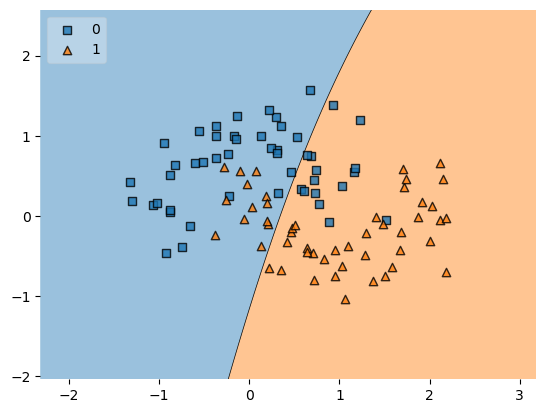

In [120]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)